In [2]:
#import os
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import random
import pickle
from PIL import Image
from numpy import asarray


In [3]:
# find and read image
images_dir = cv2.imread("/Users/atemkuh/Documents/GitHub/Mask-Finder/dataset/with_mask/0_0_≈˙◊¢ 2020-02-23 132115.png")

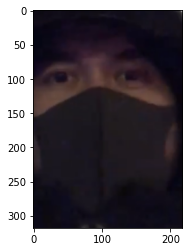

In [4]:
#view image and convert into RGB using cv2
plt.imshow(cv2.cvtColor(images_dir, cv2.COLOR_BGR2RGB))

In [5]:
#images_dir.shape

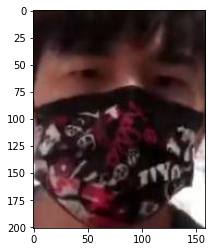

In [6]:
#loop through dataset
Images_directory = "/Users/atemkuh/Documents/GitHub/Mask-Finder/dataset"
Classes = ["with_mask","without_mask"]
for category in Classes:
    path = os.path.join(Images_directory, category)
    for img in os.listdir(path):
        images_dir = cv2.imread(os.path.join(path,img))
        
        plt.imshow(cv2.cvtColor(images_dir, cv2.COLOR_BGR2RGB))
        plt.show()
        # stop processing after first image
        break
    break
    

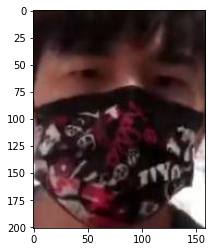

In [7]:
#resize images using imageNet 
img_size = 224
new_img_array=cv2.resize(images_dir,(img_size,img_size))
plt.imshow(cv2.cvtColor(images_dir, cv2.COLOR_BGR2RGB))
plt.show()


In [8]:
# convert images to arrays 
training_data = []

def create_training_data():
    for category in Classes:
        path = os.path.join(Images_directory,category)
        class_num = Classes.index(category)
        
        print("category")
        for img in os.listdir(path):
            try:
               # print(img, ", ", path)
                images_dir    = cv2.imread(os.path.join(path,img))
                
                new_img_array = cv2.resize(images_dir,(img_size,img_size))
                
                training_data.append([new_img_array, class_num])
              #  print(len(training_data))
                
            except Exception as e:
                print(e)
                
                
    

In [9]:
create_training_data()

category
category


In [10]:
print(len(training_data))

4095


In [11]:
random.shuffle(training_data)

In [12]:
X =[]
y=[]

for features,label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1,img_size,img_size,3)

In [13]:
X.shape

(4095, 224, 224, 3)

In [14]:
Y=np.array(y)

In [ ]:
#pickle x
pickle_out = open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()
#pickle y
pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()